In [1]:
import torch
import numpy as np
import sys
import os

sys.path.append(os.getcwd()+'/src/')
%load_ext autoreload
%autoreload 2

from attribute import *
from plot import *
from ppo_policy import *

/Users/amalota/anaconda3/envs/py37_trainloop/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from sb3_contrib import RecurrentPPO

In [3]:
model = RecurrentPPO.load('../best_model/recurrentppo/MlpLstmPolicy/best_model.zip')
X = np.load('../best_model/recurrentppo/MlpLstmPolicy/observations.npy')
X = torch.Tensor(X)
X.shape

torch.Size([13, 1, 7])

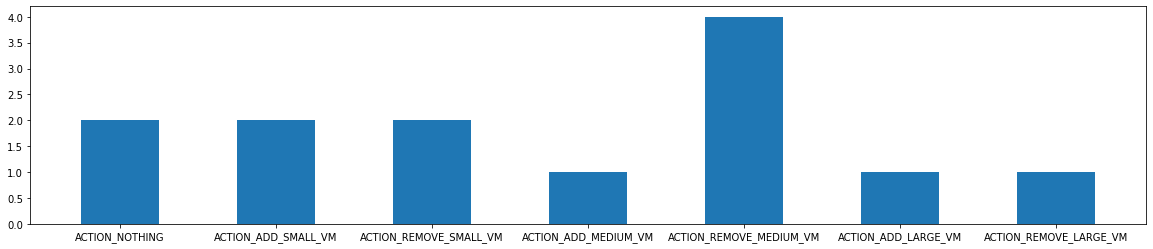

In [4]:
plot_action_histogram(model, X)

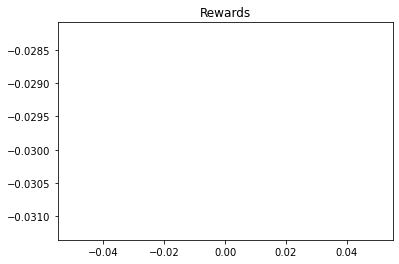

In [5]:
plot_rewards("../best_model/recurrentppo/MlpLstmPolicy/best_model_rewards.csv")

In [6]:
from ppo_policy import RecurrentPPOPolicy
ppo_net = RecurrentPPOPolicy(model.observation_space, model.action_space, model.lr_schedule, model)

In [7]:
ppo_net.lstm_hidden_state_shape

(1, 1, 256)

In [8]:
x = torch.tensor(X[0])
# x = torch.tensor(X)
ppo_net.forward(
    x, 
    lstm_states=RNNStates(
        pi=(torch.zeros(ppo_net.lstm_hidden_state_shape), torch.zeros(ppo_net.lstm_hidden_state_shape)), 
        vf=(torch.zeros(ppo_net.lstm_hidden_state_shape), torch.zeros(ppo_net.lstm_hidden_state_shape))),
    episode_starts=torch.zeros(0))

/Users/amalota/anaconda3/envs/py37_trainloop/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


tensor([[-0.0498]], grad_fn=<AddmmBackward0>)

In [9]:
x = torch.tensor(X[1])
ppo_net.predict(x)[0][0]

/Users/amalota/anaconda3/envs/py37_trainloop/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


5

In [10]:
ig_attributor = IGAttributor(net=ppo_net,
                            policy='mlp',
                            agent='ppo',
                            data=X[:500],
                            forward_args=(RNNStates(
                    pi=(torch.zeros(1, 1, 256), torch.zeros(1, 1, 256)), 
                    vf=(torch.zeros(1, 1, 256), torch.zeros(1, 1, 256))),
                    torch.zeros(0)))

/Users/amalota/Documents/trainloop-driver/analysis/src/attribute.py:115: RuntimeWarning: invalid value encountered in true_divide
  self.attributions_normalized = [action_att.sum(0) / np.linalg.norm(action_att.sum(0), ord=1, axis=0) for action_att in self.attributions]


Action made: ACTION_ADD_SMALL_VM


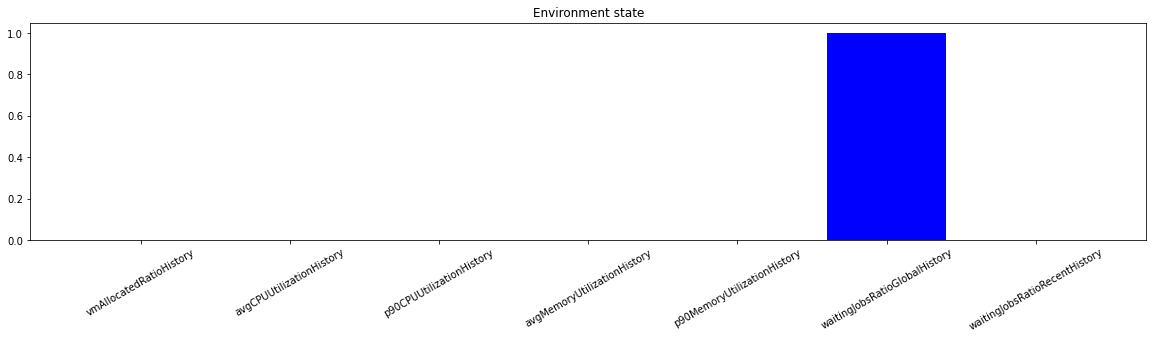

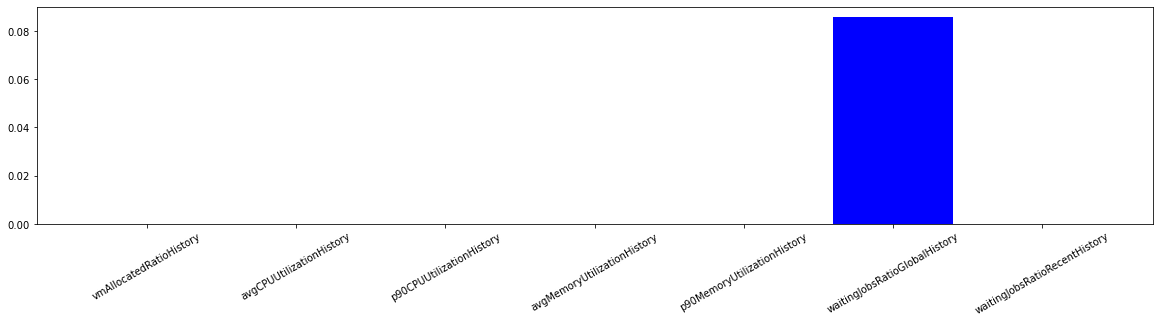

In [11]:
ig_attributor.explain_example(3)

In [12]:
X_manual = torch.Tensor([
    [[0, 1, 1, 1, 1, 1, 1]],
    [[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]],
    [[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]]
    ])

In [13]:
ig_attributor = IGAttributor(net=ppo_net,
                            policy='mlp',
                            agent='ppo',
                            data=X_manual,
                            forward_args=(RNNStates(
                    pi=(torch.zeros(1, 1, 256), torch.zeros(1, 1, 256)), 
                    vf=(torch.zeros(1, 1, 256), torch.zeros(1, 1, 256))),
                    torch.zeros(0)))

Action made: ACTION_REMOVE_LARGE_VM


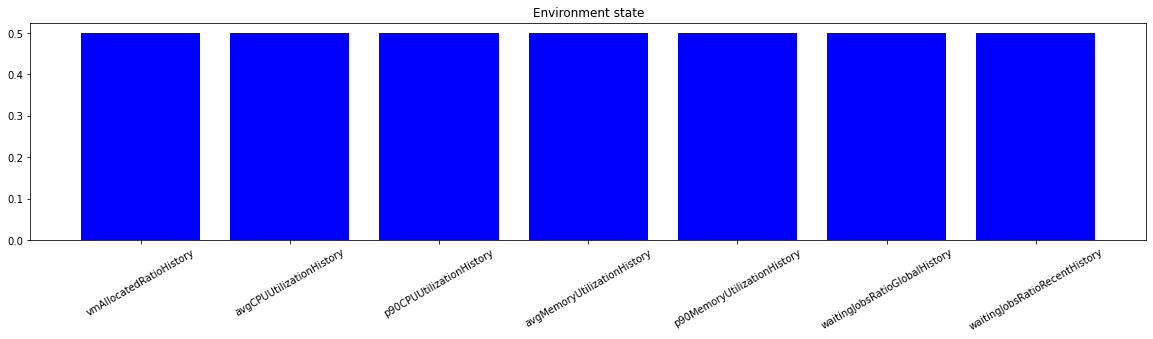

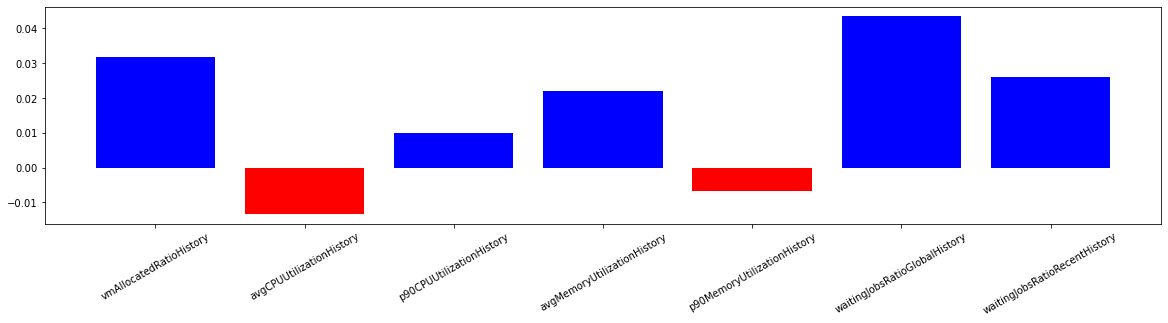

In [14]:
ig_attributor.explain_example(idx=1)